# June 23 - Predicted Distribution Analysis

## Goal - Plot the charge vs hits histogram in order to visualize the difference b/w the actual and predicted charge distribution

In [7]:
# Imports
import math
import os
import sys
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

# Add the path to the parent directory to augment search for module
par_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
if par_dir not in sys.path:
    sys.path.append(par_dir)
    
# Import the custom plotting module
from plot_utils import plot_utils
import random
import torch

# Label dict - Dictionary mapping integer labels to str
label_dict = {0:"gamma", 1:"e", 2:"mu"}

In [2]:
run_id = "20190623_034851"
dump_dir = "/home/akajal/WatChMaL/VAE/dumps/" + run_id + "/"

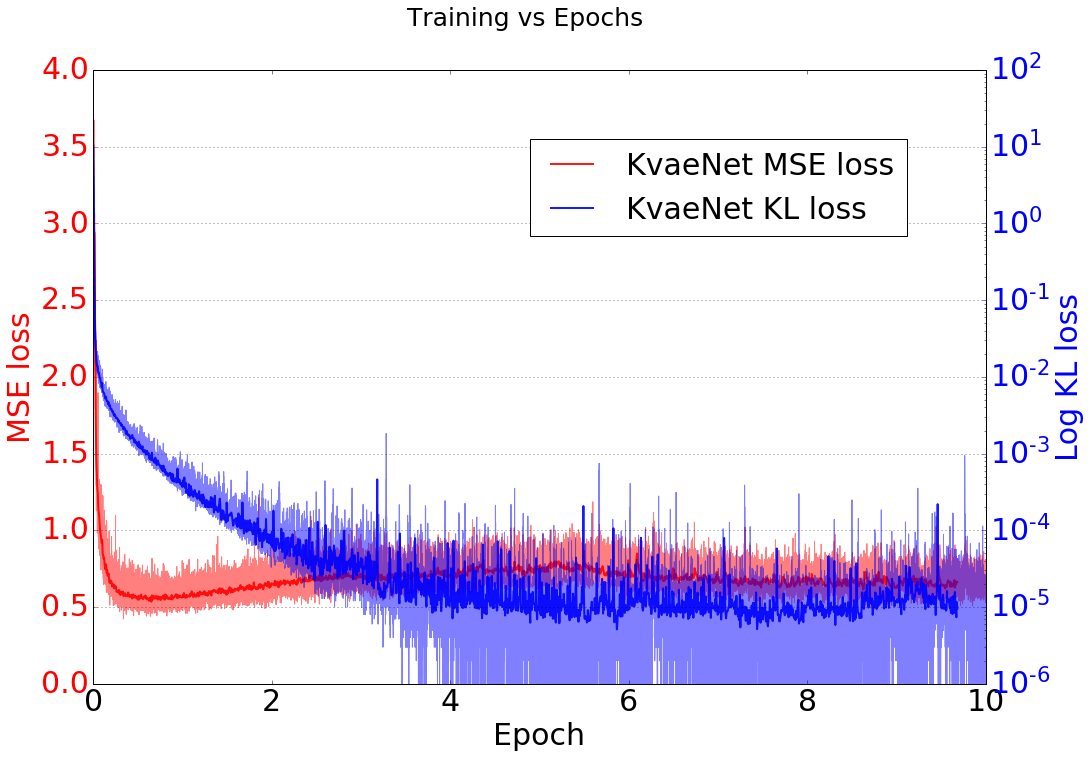

In [3]:
# Setup the path to the training log file
training_log = dump_dir + "log_train.csv"
model_name = "KvaeNet"

# Plot using the downsample intervals
plot_utils.plot_vae_training([training_log], [model_name], {model_name:["red", "blue"]},
                         downsample_interval=32, show_plot=True, legend_loc=(0.8,0.8))

---

## Intervals to analyze and their closest validation iterations :

## Epoch 1 = 6999 iteration
## Epoch 2 = 13999 iteration
## Epoch 4 = 27999 iteration
## Epoch 6 = 41999 iteration
## Epoch 8 = 55999 iteration
## Epoch 10 = 69999 iteration

---

In [53]:
# Plot the charge distribution for a given batch
def plot_charge_hist(event, recon, iteration, num_bins=100):
    
    # Flatten the input numpy arrays
    event = event.reshape(-1,1)
    recon = recon.reshape(-1,1)
    
    # Initialize the plot and corresponding parameters
    fig, ax = plt.subplots(figsize=(16,9),facecolor="w")
    ax.tick_params(axis="both", labelsize=20)
    
    # Setup the bins beforehand
    bins = np.linspace(min(np.amin(event),np.amin(recon),1),
                       max(np.amax(event),np.amax(recon)),
                       num_bins)

    # Plot the histograms overlaid
    plt.hist(event, bins, density=False,
             label="actual", color="red",
             alpha=0.5, stacked=True)
    
    plt.hist(recon, bins, density=False,
             label="reconstructed", color="blue",
             alpha=0.5, stacked=True)
    
    # Setup the axes
    ax.set_xlabel("Charge, c", fontsize=20)
    ax.set_ylabel("Number of hits", fontsize=20)
                  
    plt.yscale("log")
    plt.legend(loc="upper right", prop={"size":20})
    plt.title(r"Actual vs Reconstructed charge distribution at iteration = ${0}$".format(iteration)
              ,fontsize=20)
    
    plt.show()

## Low MSE loss, High KL loss region
## Epoch 1 = 6999 iteration

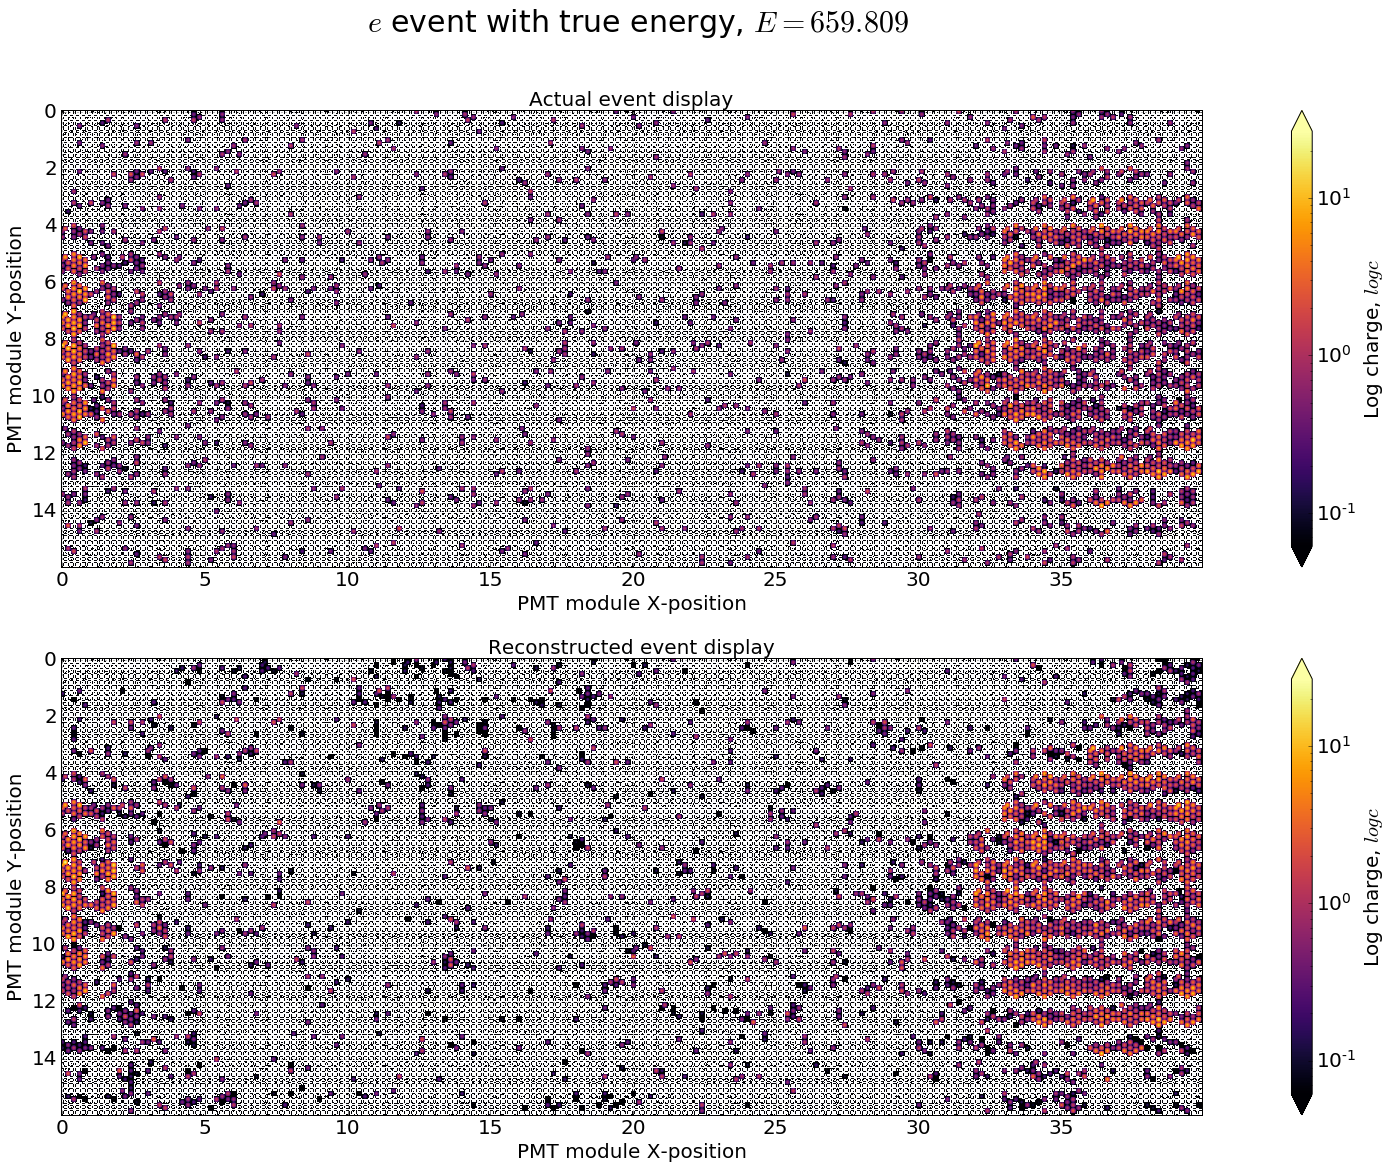

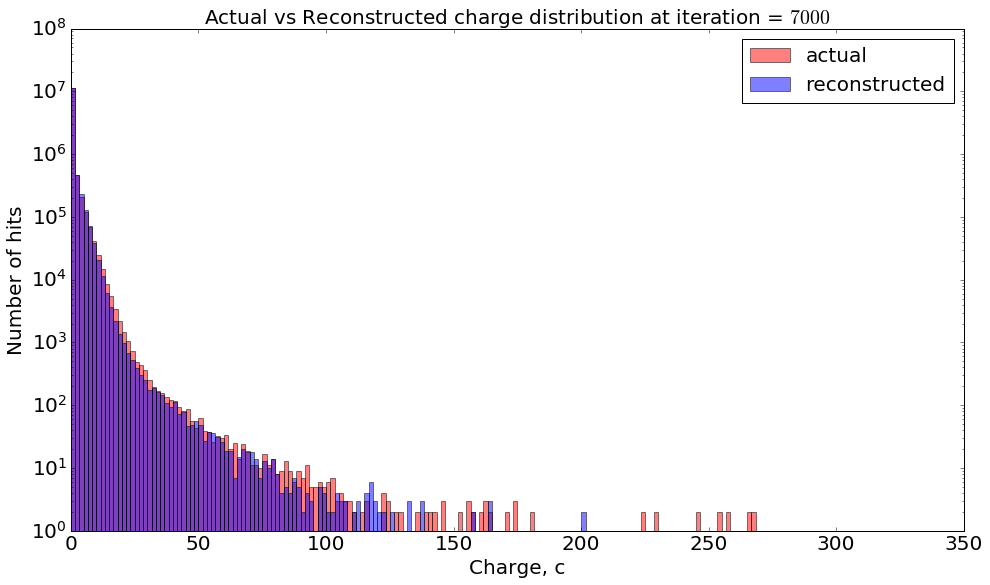

In [54]:
np_arr_path = dump_dir + "iteration_6999.npz"

# Load the numpy array
np_arr = np.load(np_arr_path)
np_event = np_arr["events"]
np_recon = np_arr["recons"]
np_labels = np_arr["labels"]
np_energies = np_arr["energies"]

i = random.randint(0, np_labels.shape[0]-1)
plot_utils.plot_actual_vs_recon(torch.tensor(np_event[i]).permute(1,2,0).numpy(),
                                np_recon[i], label_dict[np_labels[i]],
                                np_energies[i].item(),
                                show_plot=True)

plot_charge_hist(torch.tensor(np_event).permute(0,2,3,1).numpy(),
                 np_recon, 7000, num_bins=200) 

## Epoch 2 = 13999 iteration

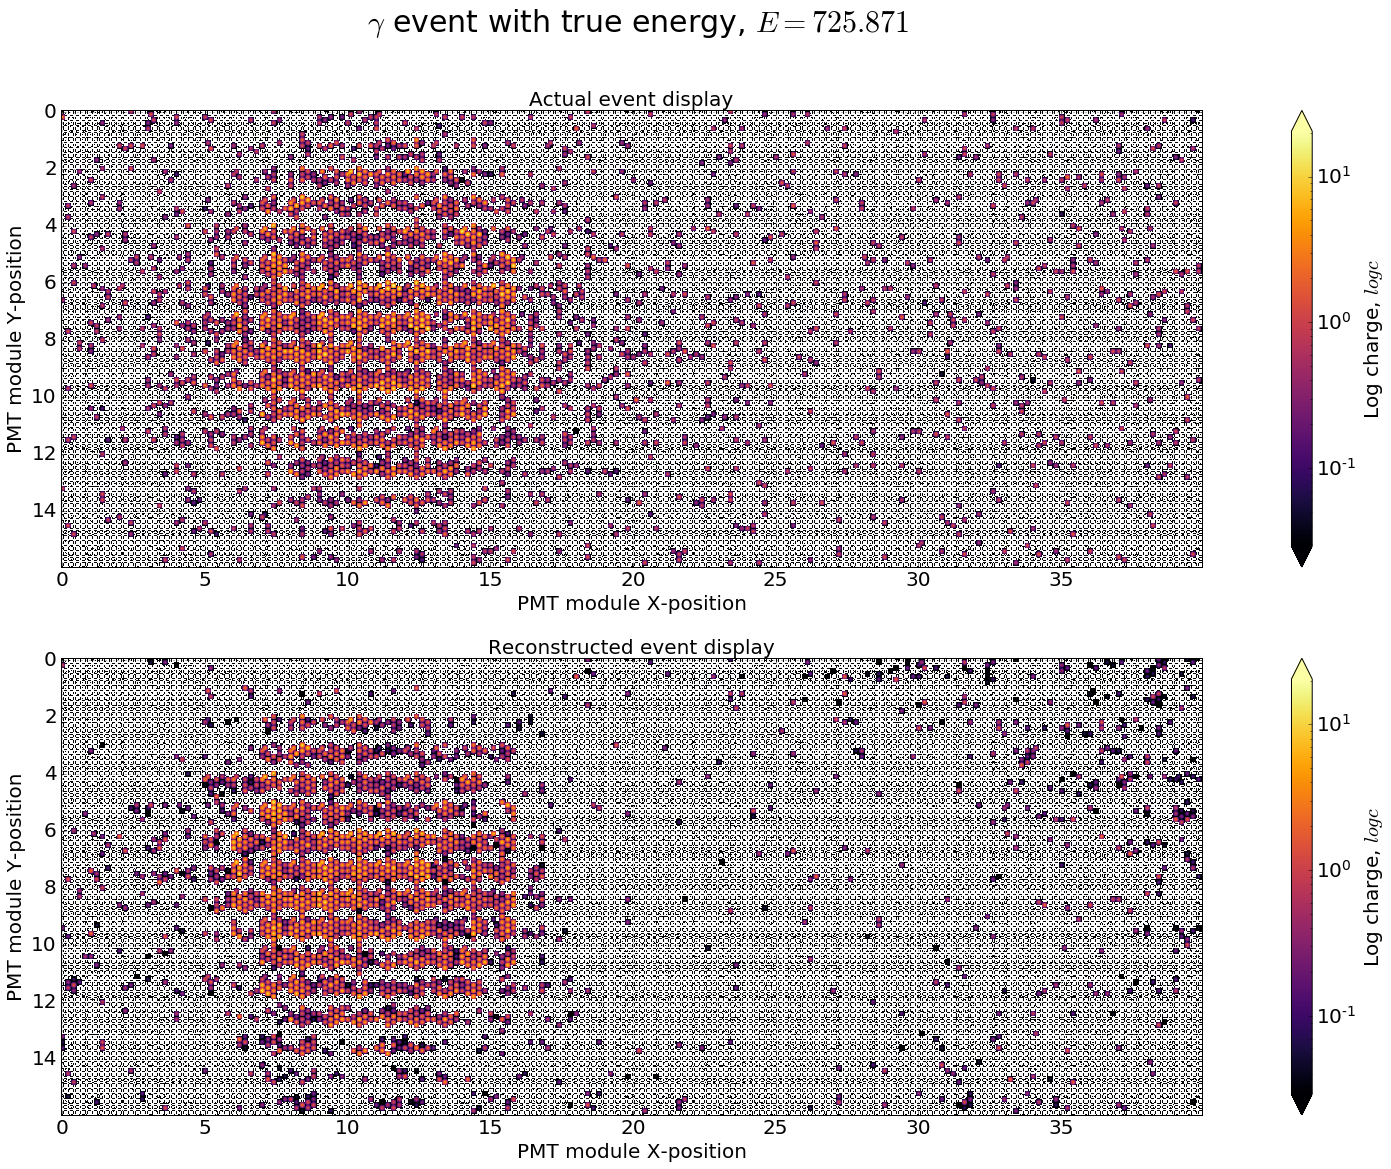

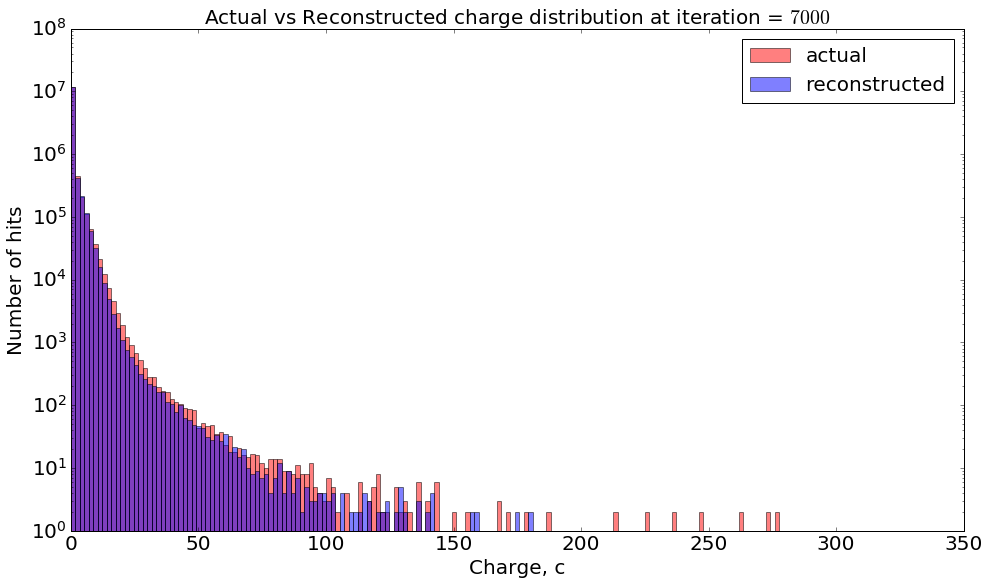

In [50]:
np_arr_path = dump_dir + "iteration_13999.npz"

# Load the numpy array
np_arr = np.load(np_arr_path)
np_event = np_arr["events"]
np_recon = np_arr["recons"]
np_labels = np_arr["labels"]
np_energies = np_arr["energies"]

i = random.randint(0, np_labels.shape[0]-1)
plot_utils.plot_actual_vs_recon(torch.tensor(np_event[i]).permute(1,2,0).numpy(),
                                np_recon[i], label_dict[np_labels[i]],
                                np_energies[i].item(),
                                show_plot=True)

plot_charge_hist(torch.tensor(np_event).permute(0,2,3,1).numpy(),
                 np_recon, 7000, num_bins=200)

## Epoch 4 = 27999 iteration

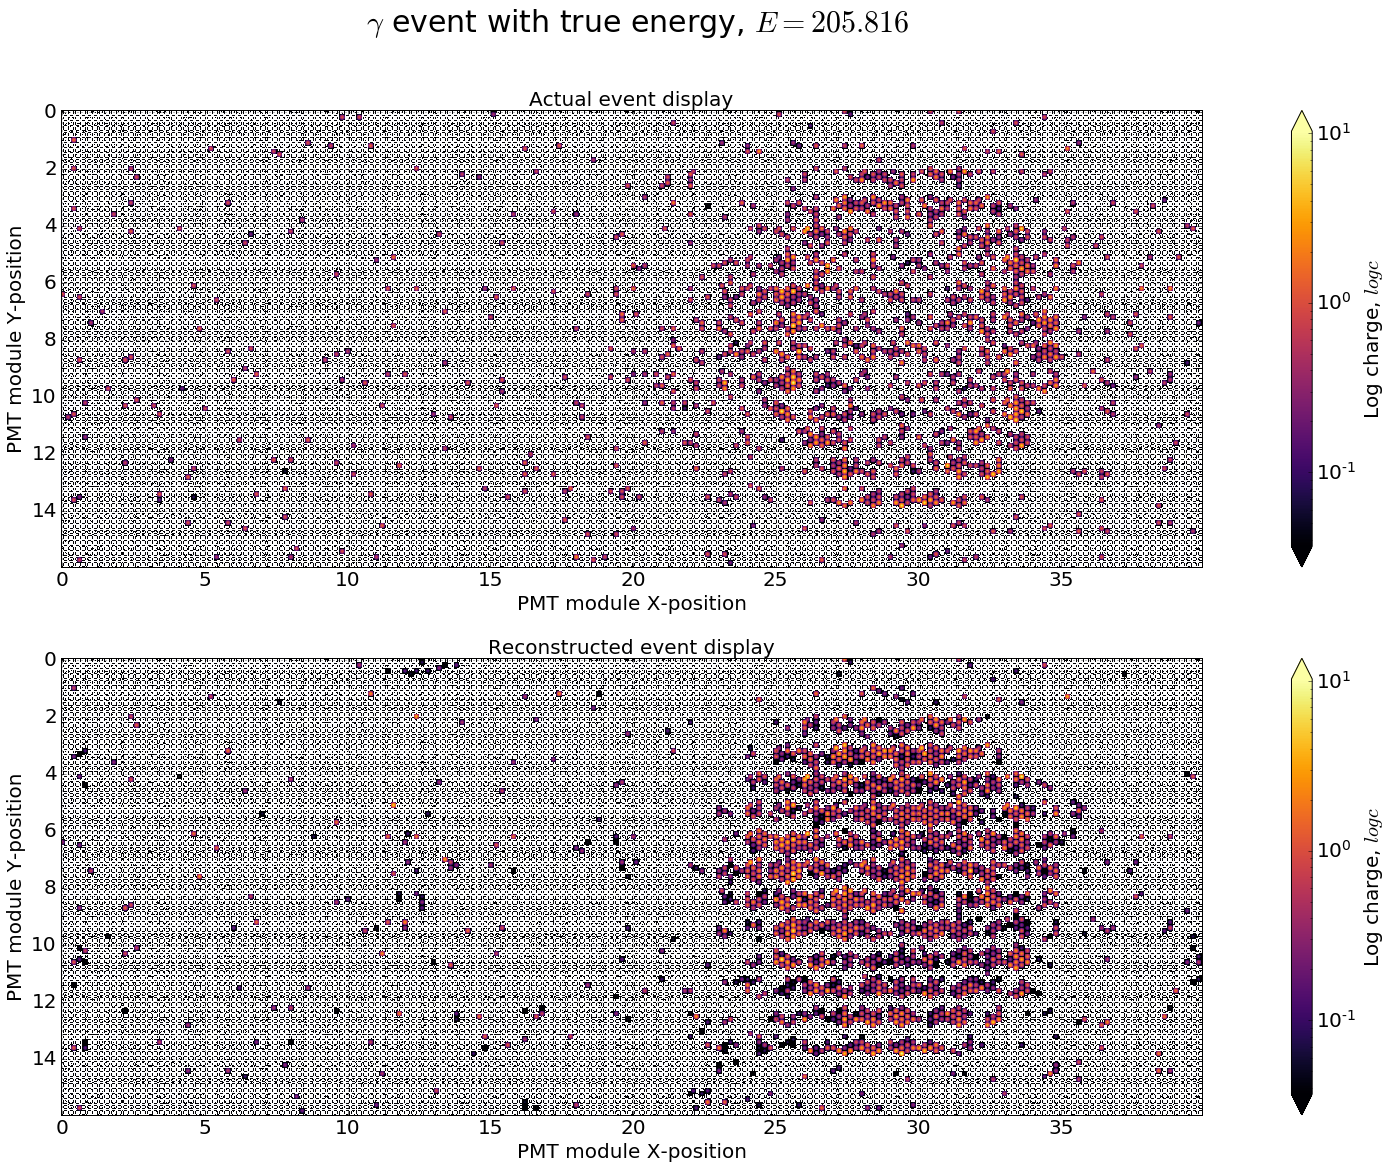

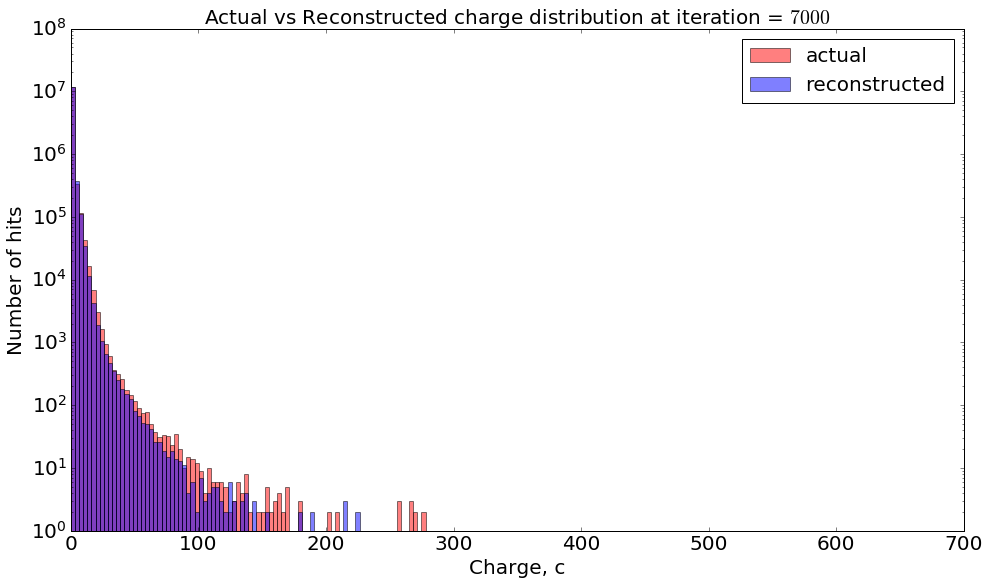

In [56]:
np_arr_path = dump_dir + "iteration_27999.npz"

# Load the numpy array
np_arr = np.load(np_arr_path)
np_event = np_arr["events"]
np_recon = np_arr["recons"]
np_labels = np_arr["labels"]
np_energies = np_arr["energies"]

i = random.randint(0, np_labels.shape[0]-1)
plot_utils.plot_actual_vs_recon(torch.tensor(np_event[i]).permute(1,2,0).numpy(),
                                np_recon[i], label_dict[np_labels[i]],
                                np_energies[i].item(),
                                show_plot=True)

plot_charge_hist(torch.tensor(np_event).permute(0,2,3,1).numpy(),
                 np_recon, 7000, num_bins=200)

## Epoch 6 = 41999 iteration

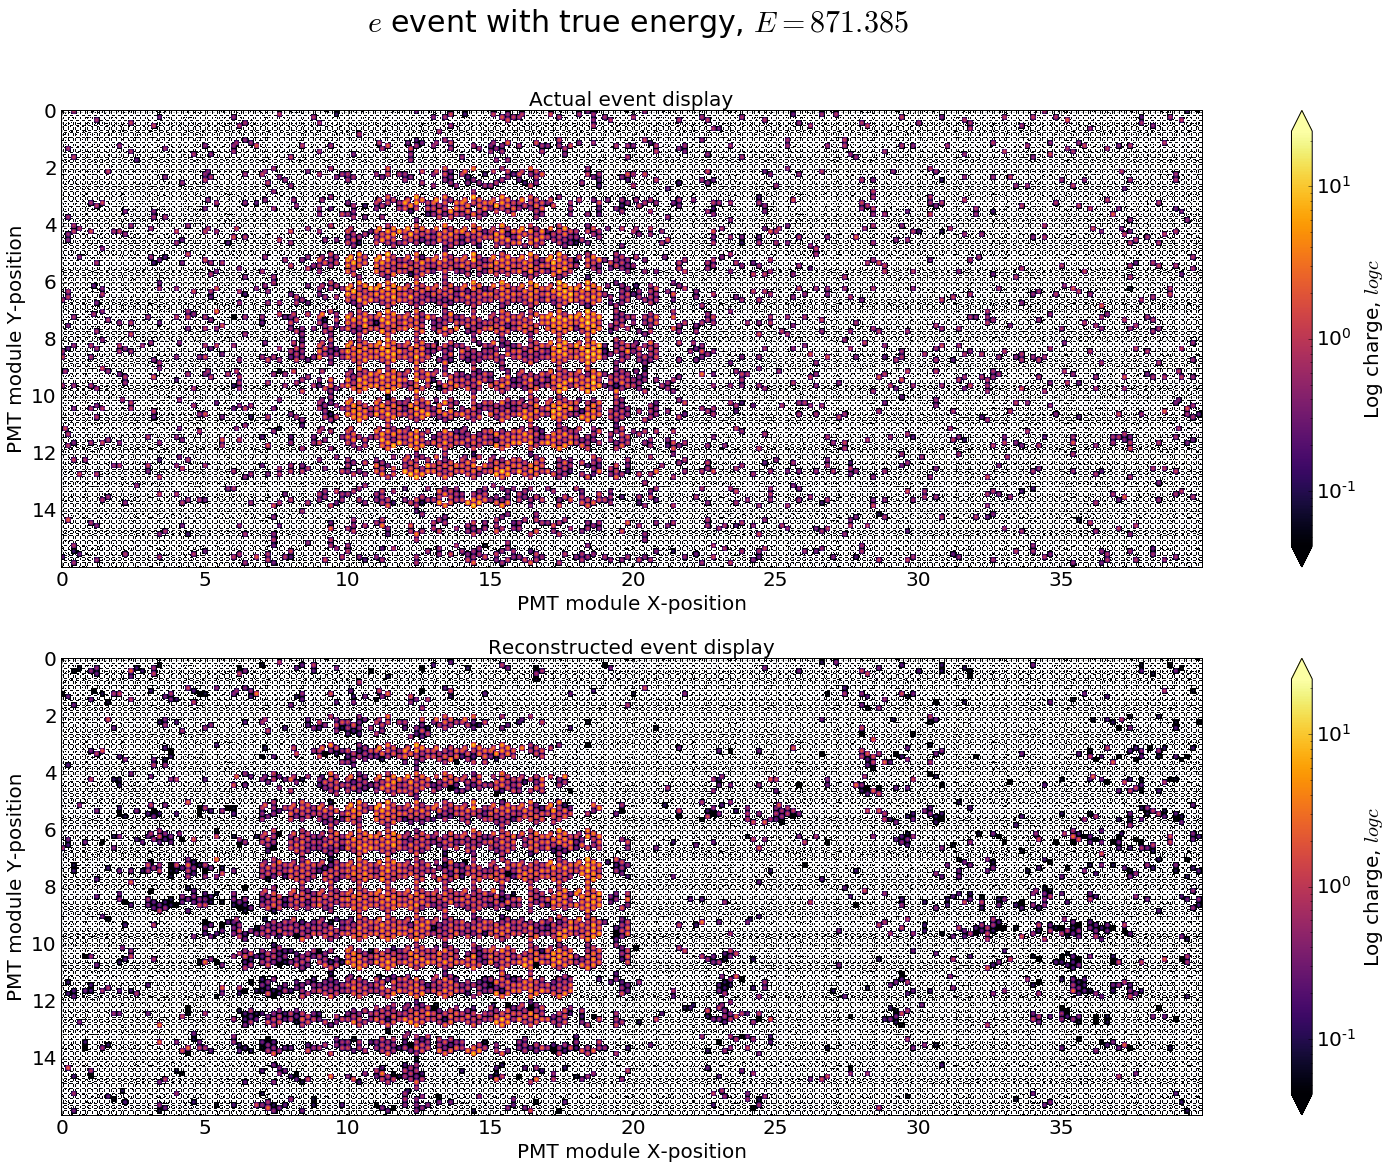

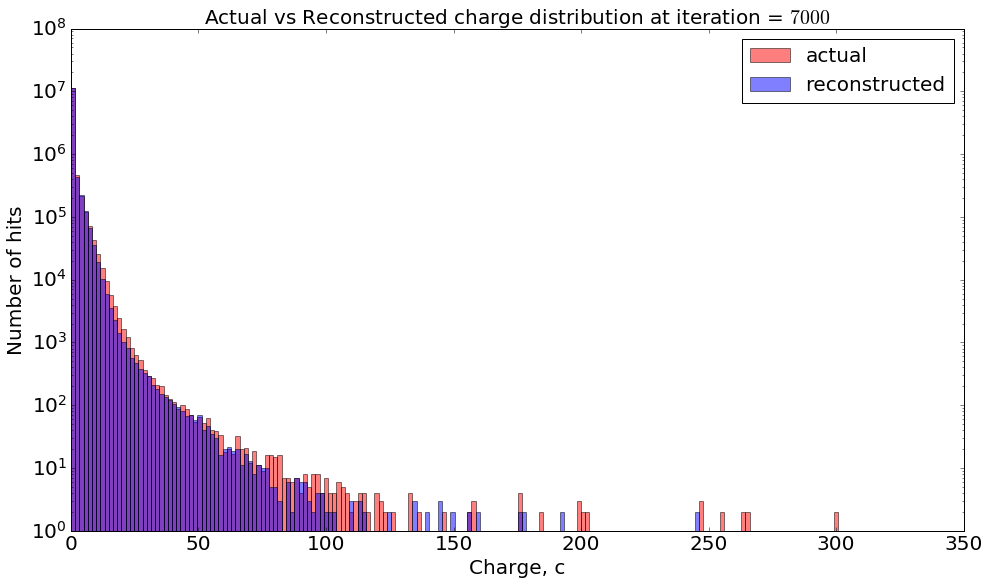

In [58]:
np_arr_path = dump_dir + "iteration_41999.npz"

# Load the numpy array
np_arr = np.load(np_arr_path)
np_event = np_arr["events"]
np_recon = np_arr["recons"]
np_labels = np_arr["labels"]
np_energies = np_arr["energies"]

i = random.randint(0, np_labels.shape[0]-1)
plot_utils.plot_actual_vs_recon(torch.tensor(np_event[i]).permute(1,2,0).numpy(),
                                np_recon[i], label_dict[np_labels[i]],
                                np_energies[i].item(),
                                show_plot=True)

plot_charge_hist(torch.tensor(np_event).permute(0,2,3,1).numpy(),
                 np_recon, 7000, num_bins=200)

## Epoch 8 = 55999 iteration


## Epoch 10 = 69999 iteration